# Project No. 4 - Global Innovation
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
14 de Abril, 2022
### Description:
Cuarto proyecto Machine Learning.  
Video disponible en: https://drive.google.com/file/d/17zK7k6mj3YS9zoj01XJzi864IIrKqtSJ/view?usp=sharing

## 1. DATA READ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df1 = pd.read_csv(".//WorldInnovation/Analysis_2016.csv", index_col=0,header=None,on_bad_lines='skip').T
df2 = pd.read_csv(".//WorldInnovation/Analysis_2017.csv", index_col=0,header=None,on_bad_lines='skip').T
df3 = pd.read_csv(".//WorldInnovation/Analysis_2018.csv", index_col=0,header=None,on_bad_lines='skip').T
df4 = pd.read_csv(".//WorldInnovation/Analysis_2019.csv", index_col=0,header=None,on_bad_lines='skip').T
df5 = pd.read_csv(".//WorldInnovation/Analysis_2020.csv", index_col=0,header=None,on_bad_lines='skip').T
df6 = pd.read_csv(".//WorldInnovation/Analysis_2021.csv", index_col=0,header=None,on_bad_lines='skip').T

frames = [df1,df2,df3,df4,df5,df6]
common_cols = list(set.intersection(*(set(df.columns) for df in frames)))
df = pd.concat([df[common_cols] for df in frames], ignore_index=True)
df

,Creative outputs,Knowledge impact,Innovation Input Sub-index,Rule of law,Research and development (R&D),Knowledge diffusion,Environmental performance,Education,Global Innovation Index,Human capital and research,...,ICT use,Regulatory environment,Regulatory quality,ICT access,Innovation Output Sub-index,Intangible assets,Knowledge and technology outputs,Business environment,Government effectiveness,Knowledge workers
0,16.7,NaN,3.7,NaN,0,0,0,NaN,6,0,...,0,NaN,NaN,0,8.3,16.7,0,0,NaN,NaN
1,15.3,26.3,40.5,37.9,1.1,23.2,74.4,37.5,28.4,23.6,...,34,59.4,50.3,45,16.2,24.9,17.2,71.8,37.1,22.4
2,14.6,34.9,32.8,28.8,0,14.5,70.3,48.9,24.5,28.2,...,15.2,51.7,14.8,42.7,16.1,23.8,17.7,56.3,24.8,20.9
3,16.7,NaN,3.7,NaN,0,0,0,NaN,6,0,...,0,NaN,NaN,0,8.3,16.7,0,0,NaN,NaN
4,16.7,NaN,3.7,NaN,0,0,0,NaN,6,0,...,0,NaN,NaN,0,8.3,16.7,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,12.3,35.1,39.7,19.1,2,8,44.3,57.3,27.4,30.4,...,48.3,49.9,17.5,60.1,15.1,19,17.9,69.8,39.2,22.8
897,33.4,36.4,42.6,46.3,6.9,41.9,33.4,54.2,37,28.1,...,55.6,54.3,36.6,52.8,31.4,41.9,29.4,61.6,51.5,31
898,12.2,10.1,21,0,0,5.1,0,22,15.4,10.1,...,11.7,30.8,0,25.7,9.7,22.4,7.2,51.9,0,11.4
899,9.5,14.1,30.4,34.5,0,7.1,34.7,51.4,19.8,17.9,...,22.1,23.8,29,35.3,9.3,14.8,9,67.1,35.6,31.5


In [3]:
df.isnull().sum()

0
Creative outputs                                      46
Knowledge impact                                     128
Innovation Input Sub-index                            46
Rule of law                                          130
Research and development (R&D)                        56
Knowledge diffusion                                   46
Environmental performance                             58
Education                                            129
Global Innovation Index                               46
Human capital and research                            46
Knowledge creation                                   128
Government's online service                           51
Market sophistication                                 46
Knowledge absorption                                 128
Online creativity                                    128
Ease of protecting minority investors                 47
Country                                                0
Infrastructure               

In [4]:
# Ya que hay 1 datos nulo para Unemployment_rate, se elimina del dataset
# Nuestro dataset queda de 4909 datos
df.dropna(axis=0, how="any", inplace=True)
df.isnull().sum()

0
Creative outputs                                     0
Knowledge impact                                     0
Innovation Input Sub-index                           0
Rule of law                                          0
Research and development (R&D)                       0
Knowledge diffusion                                  0
Environmental performance                            0
Education                                            0
Global Innovation Index                              0
Human capital and research                           0
Knowledge creation                                   0
Government's online service                          0
Market sophistication                                0
Knowledge absorption                                 0
Online creativity                                    0
Ease of protecting minority investors                0
Country                                              0
Infrastructure                                       0
Ease of 

In [5]:
df.dtypes

0
Creative outputs                                     object
Knowledge impact                                     object
Innovation Input Sub-index                           object
Rule of law                                          object
Research and development (R&D)                       object
Knowledge diffusion                                  object
Environmental performance                            object
Education                                            object
Global Innovation Index                              object
Human capital and research                           object
Knowledge creation                                   object
Government's online service                          object
Market sophistication                                object
Knowledge absorption                                 object
Online creativity                                    object
Ease of protecting minority investors                object
Country                               

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Country'] = encoder.fit_transform(df['Country'])
Countries = {index : label for index, label in enumerate(encoder.classes_)}

df = df.astype(float)

<AxesSubplot:xlabel='0', ylabel='0'>

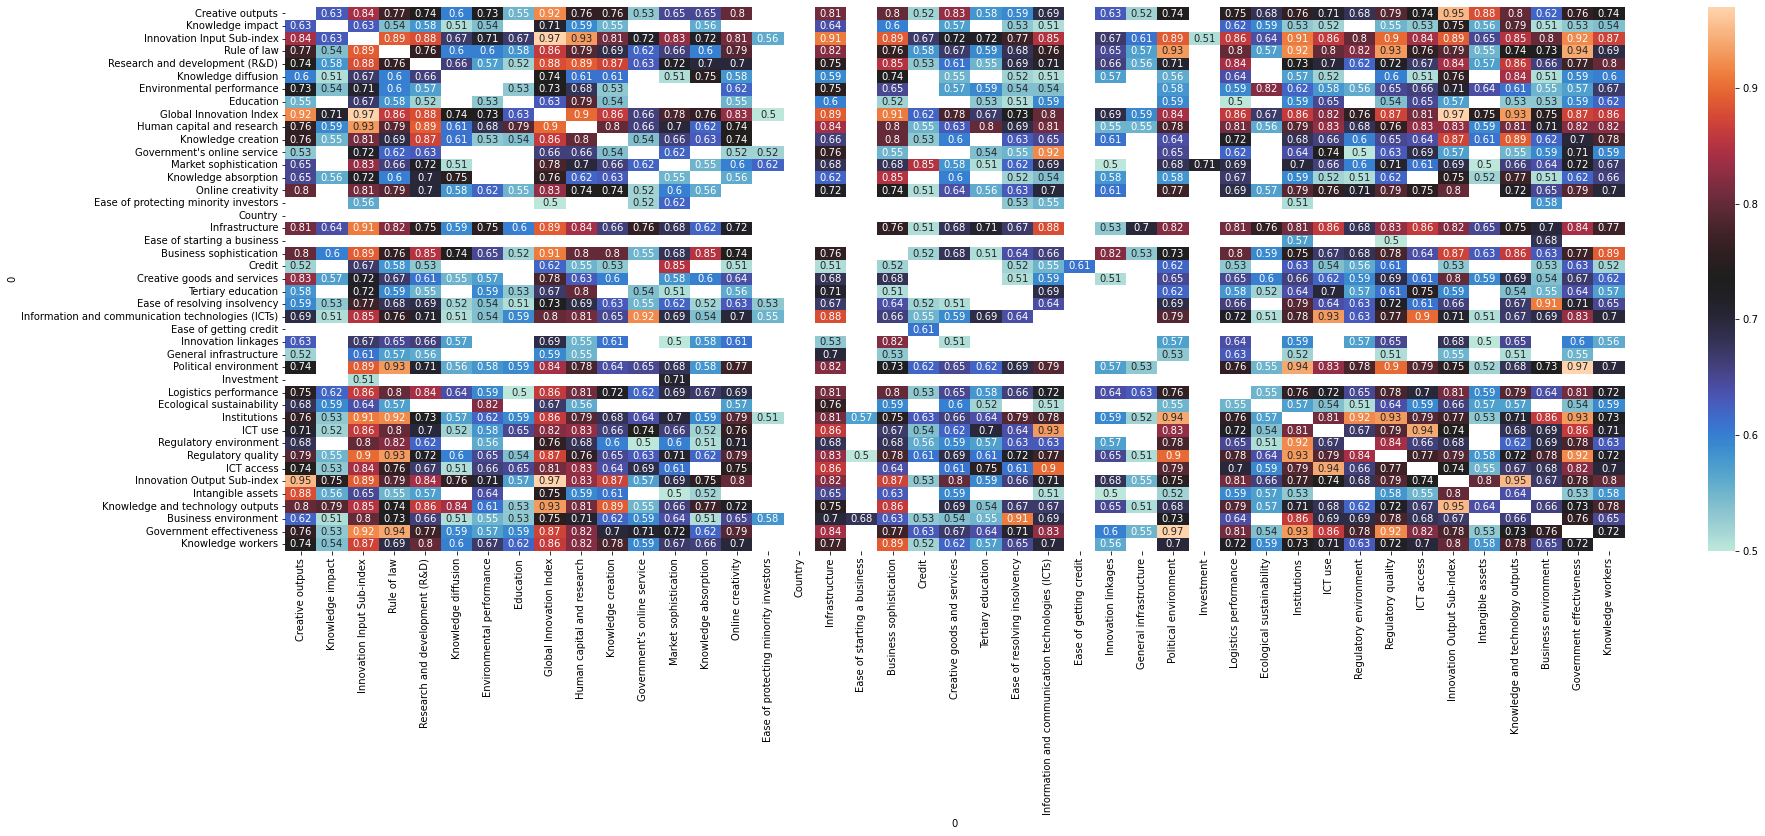

In [7]:
#Creamos la matriz de correlacion
corr_m = df.corr().round(2)
#Visualizamos nuestra matriz en un heatmap
#Valores rojos son cercanos a 1, azules cercanos a -1 y negros a 0
#Los filtramos de modo que sólo se muestren aquellos mayores a .50 0 menores a -.50 de correlación
corr_m = corr_m[((corr_m >= .5) | (corr_m <= -.5)) & (corr_m !=1.000)]
plt.figure(figsize=(30,10))
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data=corr_m, annot=True, cmap = "icefire")

1. **¿Qué se observa en la matriz de correlación?**  
A partir de la matriz de correlación, identificamos que están estrechamente correlacionados entre sí. Se encuentran que las columnas de los índices tienen una obvia correlación, mientras que columnas como instituciones, efectividad de gobierno tienen mayor cantidad de altas correlaciones con los demás datos.

2. **¿Qué predictor tiene menos correlación con los demás?**  
La facilidad de empezar una empresa, indicando que aunque haya innovación, el empezar una empresa sigue siendo algo muy incierto y no realmente lo que determina innovación o no. Por otro lado se tiene a la inversión, que tiene sentido de no estar fuertemente correlacionado al ver que hay muchas áreas en las que invertir, pero se ve que influyen directamente sobre el mercado.

3. **¿Qué variables se correlacionan más con la puntuación en ICT?**  
Para la variable en la que nos enfocaremos, que es el nivel de ICT (tecnologías de comunicación), encontramos que el subíndice input de innovación está fuertemente correlacionado, con un .85. El servicio online del gobierno con .92, el uso de tecnologías con .93, infraestructura con .88, acceso a ICTs con .9, efectividad de gobierno con .83. La mayoría de estas correlaciones es muy obvia, ya que directamente se invierte en ICTs. De estos predictores, resulta interesante cómo la organización del gobierno se destaca.  
Pasando de resultados altos, las siguientes variables con buena correlación son las puntuaciones en instituciones con .78, research and development con .71, regulatory quality con .77, aplicación de leyes con .76, trabajadores con conocimiento con .7, ambiente político con .79, .81 con human capital and research, rendimiento de logísticas con 0.72. Nos deja ver que igualmente van muy de la mano esas variables, de nuevo recalcando variables de organización gubernamental.



## 2. Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Para simplificar los siguientes pasos, creamos una función que incluye el 2.5, 3, 4, 5, 6
# Xarray = Array de predictores, Y = Valores a predecir
# plot = binario para graficar o no, Xnames = Nombres de predictores, Yname = Nombre de y
def trainingTestingA(Xarray, Y, plot, Xnames, RNames, model):
    for X in range(len(Xarray)):
        
        #---------2.5 Data Partitions (Test/Training)---------------
        # Partimos los datos de training y test en 70% y 30%
        # Asignamos un valor a random_state para asegurar que haya consistencia
        X_train, X_test, Y_train, Y_test = train_test_split(Xarray[X], Y, test_size = 0.3, random_state=7)

        #---------4 Model training-----------
        model.fit(X_train, Y_train)

        #---------5 Model testing-----------
        # model evaluation for training set
        y_train_predict = model.predict(X_train)
        # model evaluation for testing set
        y_test_predict = model.predict(X_test)

        #---------6 Results Visualization-----------
        # R2 and RMSE calulations of model from train data
        rmse_Tr = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2_Tr = r2_score(Y_train, y_train_predict)

        # R2 and RMSE calulations of model from test data
        rmse_T = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2_T = r2_score(Y_test, y_test_predict)

        print("Model Performance for " + Xnames[X] + ": Model " + RNames)

        data = {"RMSE": [rmse_Tr,rmse_T], "R2": [r2_Tr,r2_T]}
        pdf = pd.DataFrame(data, index = ["Training Set","Testing Set"])
        display(pdf)

        if (plot):
            X_test_array = np.asarray(X_test)
            X_train_array = np.asarray(X_train)
            y_test_array = np.asarray(y_test_predict)
            y_train_array = np.asarray(y_train_predict)
 
            plt.figure(figsize=(4, 4))
            try: 
                # Grafica scatter sólo para predictores de 1 variable
                plt.scatter(Xarray[X], Y, label = "Data", alpha=0.2)
            except:
                pass

            plt.plot(X_test_array,y_test_array , label="Training", color = "purple")
            plt.plot(X_train_array,y_train_array, label="Test", color = "orange")
            
            plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
            plt.xlabel(Xnames[X])
            
            plt.show()

#### 2.4 (Empirical) Dimension Reduction

In [39]:
# Vemos que en general las variables del dataset están fuertemente relacionadas, por lo que probamos usando todas las variables
# Cabe mencionar que podrían realizarse más pruebas con combinaciones entre estos 41 predictores y obtener resultados similares
X_All = df.drop(['Country', 'Information and communication technologies (ICTs)','Global Innovation Index','Innovation Input Sub-index','Innovation Output Sub-index'], axis=1)
X_ITC_V1 = df[['Institutions','Regulatory quality','Rule of law','Government effectiveness']].copy()
# Prediciremos el nivel tecnológico según todas estas variables
Y = df['Information and communication technologies (ICTs)']

In [342]:
XMvars = [X_All]
XITCV1 = [X_ITC_V1]

XMvarsN = ["All Variables"]
XITCV1N = ['Institutions, Regulatory quality, Rule of law, Government effectiveness']

## 6. Visualization of Results

### 4. ¿Podemos predecir la puntuación del ICT juntando todas las variables?

A partir de los resultados, resulta obvio que incluyendo a las variables fuertemente correlacionadas darán un buen resultado. Esto puede deberse a que van muy de la mano dichas variables con la puntuación para tecnologías de información y comunicación. Se quitaron los 3 índices de innovación dado que podrían afectar el cálculo. Se aprecia a continuación que el mejor modelo fue el primero de SVM, con un 99 en R2. Sin embargo, los demás modelos lograron todos un R2 mayor de 90 y le siguen muy de cerca.

#### Model #1 DecisionTree

Se observa que menos árboles en este caso dieron un mejor resultado, aunque son muy cercanos. La primera versión es también más confiable ya que aunque aumenta ligeramente el error para training, hay una mayor diferencia en el error de testing.

In [34]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0, max_depth = 13)
DTR2 = DecisionTreeRegressor(random_state=0, max_depth = 300)

In [41]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "DTR", DTR)
trainingTestingA(XMvars, Y, 0, XMvarsN, "DTR2", DTR2)

Model Performance for All Variables: Model DTR


,RMSE,R2
Training Set,0.069889,0.999989
Testing Set,3.794981,0.964946


Model Performance for All Variables: Model DTR2


,RMSE,R2
Training Set,0.000000,1.000000
Testing Set,3.616053,0.968174


#### Model #2 Random Forest

Se observa que el mejor modelo fue el segundo, dado los bajos errores cuadrados y el éxito que tuvo en el R2 del cross validation. Sin embargo, el primer modelo llegó a un puntaje más alto que el del segundo sobre los datos de testing. Lleva a pensar que menor número de árboles pueden obtener mejor resultado de combinarse con bootstrap en falso, aunque los resultados son cercanos.

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state = 0, n_estimators=1000)
RFR2 = RandomForestRegressor(random_state = 0, n_estimators= 400, bootstrap= False)

In [44]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "RFR", RFR)
trainingTestingA(XMvars, Y, 0, XMvarsN, "RFR2", RFR2)

Model Performance for All Variables: Model RFR


,RMSE,R2
Training Set,0.950305,0.997887
Testing Set,2.229625,0.987900


Model Performance for All Variables: Model RFR2


,RMSE,R2
Training Set,3.338759e-13,1.000000
Testing Set,3.657770e+00,0.967435


#### Model #3 Support Vector Machine (SVM)

Variando el kernel y la C (parámetro de regularización), se obtuvieron los mejores resultados con menor error en el primer modelo, que usó el kernel lineal y un valor de C mayor (0.33 contra el segundo modelo con 0.083)  

In [15]:
from sklearn.svm import SVR

SVRM = SVR(C = 100.0 / 300, kernel = 'linear')
SVRM2 = SVR(C = 25.0 / 300, kernel = 'poly')

In [16]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "SVRM", SVRM)
trainingTestingA(XMvars, Y, 0, XMvarsN, "SVRM2", SVRM2)

Model Performance for All Variables: Model SVRM


,RMSE,R2
Training Set,0.094934,0.999979
Testing Set,0.101776,0.999975


Model Performance for All Variables: Model SVRM2


,RMSE,R2
Training Set,5.681197,0.924466
Testing Set,5.008356,0.938947


#### Model #4 Neural Networks

Los resultados son muy cercanos, y se puede ver que el segundo es el mejor modelo entre los dos, ya que tiene errores menores y resultados en R2 mayores en ambos training y testing. Sin embargo, en ambos se obtuvieron excelentes resultados.

In [49]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(64,64,64,64), max_iter = 300)
MLP2 = MLPRegressor(hidden_layer_sizes=(128,128,128,128), max_iter = 300)

In [50]:
trainingTestingA(XMvars, Y, 0, XMvarsN, "MLP", MLP)
trainingTestingA(XMvars, Y, 0, XMvarsN, "MLP2", MLP2)

Model Performance for All Variables: Model MLP


,RMSE,R2
Training Set,1.539283,0.994455
Testing Set,2.230012,0.987896


Model Performance for All Variables: Model MLP2


,RMSE,R2
Training Set,1.181793,0.996732
Testing Set,1.939645,0.990843


### 5. ¿Podemos predecir la puntuación del ICT con variables menos evidentes?

Todas las variables anteriores juntas pudieron describir de excelente manera la puntuación en ICT. Sin embargo no siempre se cuenta con todos estos datos y la influencia de los mayormente correlacionales es obvia (por ejemplo el uso de ICTs obviamente indicará un ICT alto). Se probó entonces con cuatro variables que están fuertemente correlacionadas, pero menos que las directamente relacionadas con ICT. Se incluyeron institutions, regulatory quality, rule of law y government effectiveness. Entre todas representando una buena organización y control en el país.  
En general los resultados para testing con R2 fueron promedio y muy buenos para training. Random Forest pudo llegar a resultados muy buenos para training y excelentes para testing. Se crearon variaciones de los modelos, viendo como añadiendo parámeros mejoraba o no los resultados.
   
Los mejores resultados con los modelos anteriores fueron de Random Forest, Neural Networks y SVM:

In [343]:
trainingTestingA(XITCV1, Y, 0, XITCV1N, "RFR", RFR)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "MLP2", MLP2)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "SVRM", SVRM)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model RFR


,RMSE,R2
Training Set,3.738233,0.967296
Testing Set,10.936680,0.708870


Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model MLP2


,RMSE,R2
Training Set,10.462946,0.743805
Testing Set,11.694874,0.667105


Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model SVRM


,RMSE,R2
Training Set,11.027273,0.715423
Testing Set,11.797566,0.661233


>_Se crearon modelos adicionales para intentar subir R2_

#### Model #1 DecisionTree

Los resultados fueron casi idénticos para estas dos siguientes variaciones, aunque se ve que una combinación de mayor profundidad con un split mínimo menor a 0.3, fue equiparable a únicamente establecer una profundidad de 3.

In [20]:
DTR3 = DecisionTreeRegressor(random_state=0, max_depth = 3)
DTR4 = DecisionTreeRegressor(random_state=0, max_depth = 200, min_samples_split = 0.2)

In [344]:
trainingTestingA(XITCV1, Y, 0, XITCV1N, "DTR3", DTR3)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "DTR4", DTR4)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model DTR3


,RMSE,R2
Training Set,10.108406,0.760873
Testing Set,11.797870,0.661216


Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model DTR4


,RMSE,R2
Training Set,10.304972,0.751483
Testing Set,11.487970,0.678780


#### Model #2 Random Forest

Estas variaciones tuvieron resultados para testing casi iguales, pero el primer caso con mayor número de árboles tuvo menor error y mayor desempeño en training. Esto nos lleva a creer que el primero es ligeramente mejor, o podría haber ocurrido overfitting. 

In [22]:
RFR3 = RandomForestRegressor(n_estimators= 1000)
RFR4 = RandomForestRegressor(n_estimators= 200, n_jobs=102, max_samples=225)

In [345]:
trainingTestingA(XITCV1, Y, 0, XITCV1N, "RFR3", RFR3)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "RFR4", RFR4)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model RFR3


,RMSE,R2
Training Set,3.748471,0.967117
Testing Set,10.961750,0.707534


Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model RFR4


,RMSE,R2
Training Set,6.372156,0.904975
Testing Set,10.821385,0.714976


#### Model #3 Support Vector Machine (SVM)

De las dos versiones, en la que dio mejores pero pequeños cambios, se ajustó la C para que quedara un valor menos, se y poly dio mejores resultados al ajustar el coeficiente. La tolerancia y el epsilon también ayudaron. De cualquier manera, aunque el segundo modelo haya tenido mejores resultados, el aumento es insignificante.

In [24]:
SVRM3 = SVR(C = 100.0 / 300, kernel = 'linear')

In [346]:
trainingTestingA(XITCV1, Y, 0, XITCV1N, "SVRM3", SVRM3)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model SVRM3


,RMSE,R2
Training Set,11.027273,0.715423
Testing Set,11.797566,0.661233


In [347]:
SVRM4 = SVR(C = .009, kernel = 'poly', tol = 0.09, epsilon=5, coef0 = 18.02)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "SVRM4", SVRM4)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model SVRM4


,RMSE,R2
Training Set,10.829481,0.725540
Testing Set,11.522930,0.676822


#### Model #4 Neural Networks

Aquí de nuevo se intentó usar GridSearchCV para la segunda versión. Hubo una mejora de .006 en testing, en donde por un lado se usaron 4 capas de 64 neuronas cada una (más 300 max iteraciones) y en el otro una capa de 10 neuronas (con 800 max iteraciones). El primer modelo tuvo mejor R2 en training. Nos lleva a creer que para mejorar estos resultados deberíamos hacer más pruebas con mayor número de neuronas (que no excedan las 128) y capas, junto con probar con iteraciones máximas más bajas. 

In [348]:
MLP3 = MLPRegressor(random_state = 0, hidden_layer_sizes=(64,64,64,64), max_iter=300)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "MLP3", MLP3)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model MLP3


,RMSE,R2
Training Set,9.980666,0.766879
Testing Set,11.636845,0.670401


In [ ]:
mlp = MLPRegressor()
params = {
    'max_iter' : [800, 1000, 1500, 2000],
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(128,128,128,128), (64,64,64,64)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.005],
    'learning_rate': ['constant','adaptive'],
}
clf2 = GridSearchCV(mlp, params, n_jobs=-1, cv=3)
clf2.fit(X_ITC_V1, Y)

In [49]:
print('Mejores parámetros:\n', clf2.best_params_)

Mejores parámetros:
 {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 800, 'solver': 'adam'}


In [349]:
# Se obtuvieron como mejores parámetros: 
# {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 800, 'solver': 'adam'}
MLP4BP = {'alpha': 0.005, 'max_iter': 800}
MLP4 = MLPRegressor(**MLP4BP)
trainingTestingA(XITCV1, Y, 0, XITCV1N, "MLP4", MLP4)

Model Performance for Institutions, Regulatory quality, Rule of law, Government effectiveness: Model MLP4


,RMSE,R2
Training Set,10.873893,0.723285
Testing Set,11.629614,0.670810


### 7. ¿Se pueden obtener buenos resultados con la educación como variable *y*?  
A partir de la matriz de correlación, podemos observar que no hay predictores tan fuertemente correlacionados como los hay con ICT, sin embargo entre los más altos se tiene a Human Capital and Research con .79, el subíndice de input de innovación con .67, uso de ICT con .65, acceso a ICT con .65, el índice de innovación global con .63 y knowledge workers con 0.62. Esta vez fuimos agregando aquellos con puntuación más alta a partir de las variables que no fueran índices.  
Viendo como no se obtuvieron resultados mayores a 80 en testing para la pregunta anterior a pesar de tener correlaciones más fuertes que estas, era de esperarse que los predictores más correlacionados con educación no podrían sobrepasar un R2 de 80.

In [184]:
# Vemos que en general las variables del dataset están fuertemente relacionadas, por lo que probamos usando todas las variables
# Cabe mencionar que podrían realizarse más pruebas con combinaciones entre estos 41 predictores y obtener resultados similares
X_EDU_V1 = df[['Human capital and research']].copy()
X_EDU_V2 = df[['ICT use']].copy()
X_EDU_V3 = df[['ICT access']].copy()
X_EDU_V4 = df[['Knowledge workers']].copy()

X_EDU_VV1 = df[['Human capital and research','ICT use']].copy()
X_EDU_VV2 = df[['Human capital and research','ICT access']].copy()
X_EDU_VV3 = df[['Human capital and research','Knowledge workers']].copy()

X_EDU_VVV1 = df[['Human capital and research','ICT use','ICT access']].copy()
X_EDU_VVV3 = df[['Human capital and research','ICT use','Knowledge workers']].copy()
X_EDU_VVV2 = df[['Human capital and research','ICT access','Knowledge workers']].copy()

X_EDU_ALL = df[['Human capital and research','ICT access','Knowledge workers','ICT use']].copy()
# Predeciremos el nivel educativo según estas variables
Y2 = df['Education']
XEdu = [X_EDU_V1,X_EDU_V2,X_EDU_V3,X_EDU_V4]
XEdu2 = [X_EDU_VV1,X_EDU_VV2,X_EDU_VV3]
XEdu3 = [X_EDU_VVV1,X_EDU_VVV2,X_EDU_VVV3]

XEduN = ['Human capital and research','ICT use','ICT access','Knowledge workers']
XEdu2N = ['HCR and ICT use','HCR and ICT access','HCR and Knowledge workers']
XEdu3N = ['HCR and ICT use + access','HCR and ICT use + workers','HCR and ICT access + workers']

#### Single Predictors

##### Model #1 DecisionTree

Human capital and research obtuvo los mejores resultados, haciendola una buena variable para describir la educación. El resto de los resultados no fueron muy buenos

In [70]:
DTR5 = DecisionTreeRegressor(random_state=0, max_depth = 3)
trainingTestingA(XEdu, Y2, 0, XEduN, "DTR5", DTR5)

Model Performance for Human capital and research: Model DTR5


,RMSE,R2
Training Set,7.845753,0.717552
Testing Set,9.036202,0.626831


Model Performance for ICT use: Model DTR5


,RMSE,R2
Training Set,10.719738,0.472724
Testing Set,11.769289,0.366955


Model Performance for ICT access: Model DTR5


,RMSE,R2
Training Set,10.635889,0.480941
Testing Set,11.822687,0.361198


Model Performance for Knowledge workers: Model DTR5


,RMSE,R2
Training Set,10.971615,0.447655
Testing Set,11.761092,0.367837


##### Model #2 Random Forest

Se ven los mismos resultados que en Decision Tree, viendo el mismo orden en los resultados R2 para training y testing, aunque Random Forest obtuvo un mejor resultado en testing esta vez.

In [94]:
RFR5 = RandomForestRegressor(random_state = 0, n_estimators=100, min_samples_split=60)
trainingTestingA(XEdu, Y2, 0, XEduN, "RFR5", RFR5)

Model Performance for Human capital and research: Model RFR5


,RMSE,R2
Training Set,7.721497,0.726428
Testing Set,9.079608,0.623237


Model Performance for ICT use: Model RFR5


,RMSE,R2
Training Set,10.307252,0.512522
Testing Set,11.807405,0.362848


Model Performance for ICT access: Model RFR5


,RMSE,R2
Training Set,10.200950,0.522525
Testing Set,11.478176,0.397885


Model Performance for Knowledge workers: Model RFR5


,RMSE,R2
Training Set,10.610197,0.483445
Testing Set,11.584703,0.386657


##### Model #3 Support Vector Machine (SVM)

Los resultados siguieron consistentes, aunque en general SVM no dio muy buenos resultados a comparación de los dos previos.

In [128]:
SVRM5 = SVR(C = 44.0 / 300, kernel = 'linear')
trainingTestingA(XEdu, Y2, 0, XEduN, "SVRM5", SVRM5)

Model Performance for Human capital and research: Model SVRM5


,RMSE,R2
Training Set,8.791577,0.645348
Testing Set,9.967351,0.545961


Model Performance for ICT use: Model SVRM5


,RMSE,R2
Training Set,11.110419,0.433591
Testing Set,11.758708,0.368093


Model Performance for ICT access: Model SVRM5


,RMSE,R2
Training Set,11.099200,0.434734
Testing Set,11.459045,0.399890


Model Performance for Knowledge workers: Model SVRM5


,RMSE,R2
Training Set,11.434631,0.400052
Testing Set,11.989818,0.343009


##### Model #4 Neural Networks

Aquí se obtuvieron resultados comparables con los de los primeros dos modelos (DT y RF).

In [142]:
MLP5 = MLPRegressor(random_state = 0, hidden_layer_sizes=(64,64), max_iter=800)
trainingTestingA(XEdu, Y2, 0, XEduN, "MLP5", MLP5)

Model Performance for Human capital and research: Model MLP5


,RMSE,R2
Training Set,8.247947,0.687852
Testing Set,9.056327,0.625167


Model Performance for ICT use: Model MLP5


,RMSE,R2
Training Set,11.044855,0.440256
Testing Set,11.855505,0.357647


Model Performance for ICT access: Model MLP5


,RMSE,R2
Training Set,11.104714,0.434172
Testing Set,11.477530,0.397953


Model Performance for Knowledge workers: Model MLP5


,RMSE,R2
Training Set,11.394342,0.404272
Testing Set,11.930081,0.349540


#### Multiple (2) Predictors

MLP y SVM no obtuvieron tan buenos resultados como DT y RF, en donde RF dio los mejores tanto en training como en testing. Con respecto a las variables, acceso, uso y trabajadores en ese orden obtuvieron mayor R2, aunque las diferencias entre las dos variables de ICT fueron mínimas, y en MLP y SVM los resultados fueron muy similares para las 3 combinaciones.

##### Model #1 DecisionTree

In [143]:
trainingTestingA(XEdu2, Y2, 0, XEdu2N, "DTR5", DTR5)

Model Performance for HCR and ICT use: Model DTR5


,RMSE,R2
Training Set,7.703523,0.727700
Testing Set,9.411742,0.595169


Model Performance for HCR and ICT access: Model DTR5


,RMSE,R2
Training Set,7.606601,0.734509
Testing Set,9.139447,0.618255


Model Performance for HCR and Knowledge workers: Model DTR5


,RMSE,R2
Training Set,7.845753,0.717552
Testing Set,9.036202,0.626831


##### Model #2 Random Forest

In [144]:
trainingTestingA(XEdu2, Y2, 0, XEdu2N, "RFR5", RFR5)

Model Performance for HCR and ICT use: Model RFR5


,RMSE,R2
Training Set,7.202115,0.761993
Testing Set,8.919781,0.636385


Model Performance for HCR and ICT access: Model RFR5


,RMSE,R2
Training Set,6.945746,0.778636
Testing Set,8.637527,0.659033


Model Performance for HCR and Knowledge workers: Model RFR5


,RMSE,R2
Training Set,7.515785,0.740810
Testing Set,8.928074,0.635708


##### Model #3 Support Vector Machine (SVM)

In [145]:
trainingTestingA(XEdu2, Y2, 0, XEdu2N, "SVRM5", SVRM5)

Model Performance for HCR and ICT use: Model SVRM5


,RMSE,R2
Training Set,8.799458,0.644711
Testing Set,9.973649,0.545387


Model Performance for HCR and ICT access: Model SVRM5


,RMSE,R2
Training Set,8.797700,0.644853
Testing Set,9.959429,0.546682


Model Performance for HCR and Knowledge workers: Model SVRM5


,RMSE,R2
Training Set,8.796201,0.644974
Testing Set,9.971373,0.545594


##### Model #4 Neural Networks

In [146]:
trainingTestingA(XEdu2, Y2, 0, XEdu2N, "MLP5", MLP5)

Model Performance for HCR and ICT use: Model MLP5


,RMSE,R2
Training Set,8.296474,0.684168
Testing Set,9.402159,0.595993


Model Performance for HCR and ICT access: Model MLP5


,RMSE,R2
Training Set,8.339782,0.680862
Testing Set,9.339915,0.601324


Model Performance for HCR and Knowledge workers: Model MLP5


,RMSE,R2
Training Set,8.318626,0.682479
Testing Set,9.421643,0.594317


#### Multiple (2+) Predictors

Al contrario de como se esperaba, generalmente dieron mejores resultados combinando workers con ICT use, cuando se esperaban mejores resultados con ICT use y access. En DT y RF se cumplió esto, mientras que en SVM estuvieron muy equitativos y en MLP los dos de ICT describieron mejor la educación además de ICT use y workers teniendo el peor desempeño de sus 3 combinaciones. Los mejores resultados fueron de Random Forest, que logró R2 muy buenos y uno excelente en training, aunque sólo regulares con uno muy bueno en testing.

##### Model #1 DecisionTree

In [168]:
trainingTestingA(XEdu3, Y2, 0, XEdu3N, "DTR5", DTR5)

Model Performance for HCR and ICT use + access: Model DTR5


,RMSE,R2
Training Set,7.606601,0.734509
Testing Set,9.139447,0.618255


Model Performance for HCR and ICT use + workers: Model DTR5


,RMSE,R2
Training Set,7.606601,0.734509
Testing Set,9.139447,0.618255


Model Performance for HCR and ICT access + workers: Model DTR5


,RMSE,R2
Training Set,7.703523,0.727700
Testing Set,9.411742,0.595169


##### Model #2 Random Forest

In [170]:
trainingTestingA(XEdu3, Y2, 0, XEdu3N, "RFR4", RFR4)

Model Performance for HCR and ICT use + access: Model RFR4


,RMSE,R2
Training Set,4.684058,0.899327
Testing Set,8.292004,0.685766


Model Performance for HCR and ICT use + workers: Model RFR4


,RMSE,R2
Training Set,4.470594,0.908294
Testing Set,8.065408,0.702706


Model Performance for HCR and ICT access + workers: Model RFR4


,RMSE,R2
Training Set,4.858263,0.891699
Testing Set,8.505545,0.669373


##### Model #3 Support Vector Machine (SVM)

In [171]:
trainingTestingA(XEdu3, Y2, 0, XEdu3N, "SVRM5", SVRM5)

Model Performance for HCR and ICT use + access: Model SVRM5


,RMSE,R2
Training Set,8.807912,0.644028
Testing Set,9.999461,0.543031


Model Performance for HCR and ICT use + workers: Model SVRM5


,RMSE,R2
Training Set,8.791338,0.645367
Testing Set,9.949660,0.547571


Model Performance for HCR and ICT access + workers: Model SVRM5


,RMSE,R2
Training Set,8.794158,0.645139
Testing Set,9.966790,0.546012


##### Model #4 Neural Networks

In [183]:
trainingTestingA(XEdu3, Y2, 0, XEdu3N, "MLP2", MLP2)

Model Performance for HCR and ICT use + access: Model MLP2


,RMSE,R2
Training Set,7.664689,0.730438
Testing Set,8.857556,0.641440


Model Performance for HCR and ICT use + workers: Model MLP2


,RMSE,R2
Training Set,7.767284,0.723173
Testing Set,9.120050,0.619873


Model Performance for HCR and ICT access + workers: Model MLP2


,RMSE,R2
Training Set,8.089255,0.699748
Testing Set,9.671026,0.572556


##### All models, all predictors

Se puede ver que el mejor modelo encontrado para las 4 variables fue el de Random Forest (mayor R2 menor error), seguido por el de DT, MLP, y SVM. La mayoría de los R2 en training fueron muy buenos, uno siendo excelente y el otro regular. En cuanto a testing, se conserva el orden mencionado al principio pero con MLP desempeñando mejor que en DT.

Ya que el mejor resultado fue tr=.7067 test=.96 para los modelos con 4 variables en x, no se alcanzó a llegar a una combinación mayor a los resultados de "Model Performance for HCR and ICT use + workers: Model RFR4", que se hizo con tres variables siendo HCR, ITC use, Knowledge workers.

In [202]:
trainingTestingA([X_EDU_ALL], Y2, 0, ["ALL"], "DTR4", DTR4)
trainingTestingA([X_EDU_ALL], Y2, 0, ["ALL"], "RFR3", RFR3)
trainingTestingA([X_EDU_ALL], Y2, 0, ["ALL"], "SVRM5", SVRM5)
trainingTestingA([X_EDU_ALL], Y2, 0, ["ALL"], "MLP5", MLP5)

Model Performance for ALL: Model DTR4


,RMSE,R2
Training Set,7.28886,0.756225
Testing Set,9.13973,0.618231


Model Performance for ALL: Model RFR3


,RMSE,R2
Training Set,2.559655,0.969937
Testing Set,8.010547,0.706736


Model Performance for ALL: Model SVRM5


,RMSE,R2
Training Set,8.801569,0.644541
Testing Set,9.989687,0.543924


Model Performance for ALL: Model MLP5


,RMSE,R2
Training Set,7.757243,0.723889
Testing Set,8.813682,0.644983


## Preguntas

### Generales

1. **¿Cuál es el problema que se quiere resolver?**  
La tecnología se vuelve cada vez más relevante en nuestro mundo, por lo que es importante que los países estén dispuestos a mejorar partes de sus áreas para conseguir lograr una buena puntuación en innovación, de manera que las oportunidades de trabajo, estilo de vida y bienestar mejoren para sus ciudadanos. El problema consiste en identificar en qué se debería mayormente invertir.

2. **¿Qué datos son necesarios y están disponibles para resolver el problema? ¿Existe un data set que se pueda utilizar?¿Es factible generar y construir un data set?**  
Hay muchos datos en internet que tienen relación con la innovación y tecnología, aunque encontrar un dataset apropiado puede ser difícil debido a la falta de columnas o datos muy resumidos. Por eso construimos un dataset a partir de los csv que ofrece Global Innovation Index, rescatando el mayor número de columnas con datos concordantes entre años.

3. **¿Qué tipos de análisis espera realizar con los datos?**  
Se espera realizar un análisis de regresión.

4. **¿Qué resultados se espera tener? ¿Cuál es el rendimiento mínimo que considera útil para su modelo?**   
Se espera tener buenos resultados que den más del 80% e identificar principales predictores.

### Específicas

8. **¿Cuáles son los valores promedios de las columnas?**  
Se puede apreciar que la mayoría de las puntuaciones son menos o están en el promedio/mitad (50). Valores como business environment (70.77), ICT access (61.9), regulatory environment (65.68), sí se encuentran por arriba en las puntuaciones. Lo mismo se puede decir de los servicios online del gobierno e instituciones (64.97), facilidad de comenzar empresa (86), ambiente regulatorio (65.68). Eso puede indicar que la mayoría de los países tienen una puntuación decente en estas áreas.

In [339]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)
df.describe()

,Creative outputs,Knowledge impact,Innovation Input Sub-index,Rule of law,Research and development (R&D),Knowledge diffusion,Environmental performance,Education,Global Innovation Index,Human capital and research,Knowledge creation,Government's online service,Market sophistication,Knowledge absorption,Online creativity,Ease of protecting minority investors,Country,Infrastructure,Ease of starting a business,Business sophistication,Credit,Creative goods and services,Tertiary education,Ease of resolving insolvency,Information and communication technologies (ICTs),Ease of getting credit,Innovation linkages,General infrastructure,Political environment,Investment,Logistics performance,Ecological sustainability,Institutions,ICT use,Regulatory environment,Regulatory quality,ICT access,Innovation Output Sub-index,Intangible assets,Knowledge and technology outputs,Business environment,Government effectiveness,Knowledge workers
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.664466,31.903511,44.863062,50.556742,21.001124,25.933287,60.325843,47.158146,36.404775,33.659691,20.854635,64.128371,47.842837,32.347191,20.800000,58.477388,98.087079,44.522472,86.405197,33.312921,40.062360,20.170646,32.651685,54.695787,60.224438,60.140449,29.517978,34.774719,58.450983,40.494242,45.065449,38.568539,64.972051,50.138483,65.687360,51.012500,61.911376,27.945927,38.841573,26.230197,70.776124,52.773876,38.071067
std,13.444796,13.911993,11.935563,24.922070,24.556287,15.897965,17.348415,14.790721,12.136400,15.383024,19.979070,22.499079,10.885412,12.331163,19.860232,14.479678,58.638570,12.506148,8.670487,12.913305,16.316346,14.147798,16.026705,19.293426,20.617811,20.470416,14.302163,13.007197,19.136559,14.449708,25.956088,13.557852,14.758755,24.367185,17.498397,22.726181,20.106239,13.024325,14.789931,13.996090,11.920850,21.878109,18.520183
min,0.600000,0.800000,19.900000,0.000000,0.000000,0.300000,0.000000,0.000000,13.600000,1.400000,0.400000,0.000000,19.600000,11.400000,0.000000,10.000000,0.000000,14.000000,40.400000,8.700000,0.200000,0.000000,0.000000,0.000000,9.400000,0.000000,1.200000,0.200000,0.000000,4.000000,0.000000,12.700000,16.000000,1.400000,0.000000,0.000000,16.700000,5.600000,0.000000,2.000000,24.400000,0.000000,0.000000
25%,19.200000,23.000000,35.600000,30.975000,2.000000,14.775000,46.475000,36.700000,27.000000,21.100000,5.700000,49.375000,40.900000,22.600000,5.000000,48.300000,45.000000,35.575000,82.275000,23.875000,29.300000,7.800000,21.575000,40.350000,44.025000,45.000000,19.000000,25.450000,43.800000,30.975000,24.675000,28.050000,53.375000,30.275000,54.300000,33.700000,45.575000,17.775000,28.675000,15.775000,61.600000,36.150000,23.775000
50%,28.100000,33.000000,42.850000,44.750000,9.050000,21.300000,62.300000,48.400000,34.000000,31.800000,12.900000,66.700000,46.650000,31.100000,14.050000,60.000000,97.000000,45.000000,88.200000,30.200000,38.400000,19.050000,34.100000,52.900000,63.150000,60.000000,25.350000,33.100000,55.700000,38.400000,39.800000,38.000000,63.650000,53.300000,66.350000,47.900000,66.450000,25.400000,38.900000,22.750000,71.350000,49.400000,36.400000
75%,39.200000,41.425000,53.250000,70.125000,35.675000,33.050000,74.300000,57.700000,45.325000,44.750000,30.900000,81.900000,53.950000,39.325000,31.225000,68.300000,147.000000,54.200000,93.000000,40.325000,48.950000,30.600000,43.550000,70.325000,77.200000,75.000000,38.500000,43.275000,74.900000,46.750000,63.000000,49.500000,76.600000,70.750000,78.100000,69.900000,78.925000,37.200000,49.100000,33.900000,80.300000,70.525000,50.875000
max,69.500000,67.000000

8. **¿Cuáles son los países es los que tiene puntuación más alta en ITC?**

La república de Corea y Qatar son los dos países con mayor puntuación. De donde van decreciendo las puntuaciones gradualmente hasta llegar a Tonga, donde por ejemplo 3 lugares más abajo hay una diferencia de .5 mientras que con Corea hay una de 1.8. Analizando Corea, se ve que sus campos más significativos son la efectividad de gobierno, business y political environment, acceso y uso de ICTs, Ease of resolving insolvency y de empezar una empresa, Research and development (R&D), y la más destacada, servicios online del gobierno con una puntuación de 100.

Como se ve, variables como Institutions (cercana a 80), Regulatory quality(71.5), Rule of law (78.2), Government effectiveness (81.2), que se usaron como predictores secundarios, son todos valores aceptablemente altos.

In [332]:
# Obtenemos los países cuya puntuación esté entre las mayores
hITC = df.groupby('Country').first().reset_index().sort_values('Information and communication technologies (ICTs)', ascending=False)[['Country', 'Information and communication technologies (ICTs)']]
hITC.loc[hITC['Information and communication technologies (ICTs)'].astype(float) >df['Information and communication technologies (ICTs)'].mean()][['Country', 'Information and communication technologies (ICTs)']].replace({"Country": Countries}).head(10)

,Country,Information and communication technologies (ICTs)
151,Republic of Korea,94.8
150,Qatar,94.0
196,United Kingdom,93.4
195,United Arab Emirates (the),93.0
94,Kenya,92.9
93,Kazakhstan,91.6
186,Tonga,90.6
130,Netherlands (the),90.5
123,Montserrat,90.1
200,United States of America,90.1


In [321]:
cmax = df.loc[df['Information and communication technologies (ICTs)'].idxmax()]['Country']
Countries[int(cmax)]

'Republic of Korea'

In [340]:
# Obtenemos todos los registros
groupdf = df.groupby('Country').first().reset_index()
groupdf = groupdf.loc[groupdf['Country'] == cmax]

groupdf.head()

,Country,Creative outputs,Knowledge impact,Innovation Input Sub-index,Rule of law,Research and development (R&D),Knowledge diffusion,Environmental performance,Education,Global Innovation Index,Human capital and research,Knowledge creation,Government's online service,Market sophistication,Knowledge absorption,Online creativity,Ease of protecting minority investors,Infrastructure,Ease of starting a business,Business sophistication,Credit,Creative goods and services,Tertiary education,Ease of resolving insolvency,Information and communication technologies (ICTs),Ease of getting credit,Innovation linkages,General infrastructure,Political environment,Investment,Logistics performance,Ecological sustainability,Institutions,ICT use,Regulatory environment,Regulatory quality,ICT access,Innovation Output Sub-index,Intangible assets,Knowledge and technology outputs,Business environment,Government effectiveness,Knowledge workers
151,151.0,52.1,40.0,65.2,78.2,89.8,57.2,66.5,61.5,59.3,67.4,66.1,100.0,60.0,54.0,28.1,74.0,59.2,93.4,60.1,64.2,32.4,51.0,82.9,94.8,65.0,48.3,49.4,82.1,31.5,72.7,33.4,79.5,89.1,68.2,71.5,90.0,53.3,74.1,54.5,88.1,81.2,78.1


9. **¿Cuáles son los países que tienen puntuación más baja en ITC?**  
Bajo el mismo análisis, se tiene a Namibia como el país con menor ICT, con una diferencia de alrededor de 3 puntos menos que el penúltimo país con peor ICT (Guatemala). Al analizar a Namibia, se ve que todos sus valores son muy bajos, con excepción de 86.2 para facilidad de empezar una empresa, ambiente empresarial (58.9) y ambiente regulado con 55.4. Ya que se tiene un enfoque a las empresas junto con un puntaje de 30.6 para sofistificación de negocios, se podría especular que aunque este es medianamente bueno, no está enfocado a algún aspecto tecnológico. Muy pocos tienen acceso a ITCs (20.4) y una mínima parte realmente los usa (1.4). Por consecuente, ninguno de los índices para ICTs es alto o promedio.  
Igualmente se puede especular que las ICTs van fuertemente de la mano con todos los índices, en donde si aumenta ICT, aumentarán los demás indicadores de innovación.

In [333]:
# Obtenemos los países cuya puntuación esté entre las menores
# Obtenemos los países cuya puntuación esté entre las mayores
hITC2 = hITC.sort_values('Information and communication technologies (ICTs)', ascending=True)
hITC2.loc[hITC2['Information and communication technologies (ICTs)'].astype(float) < df['Information and communication technologies (ICTs)'].mean()][['Country', 'Information and communication technologies (ICTs)']].replace({"Country": Countries}).head(10)

,Country,Information and communication technologies (ICTs)
127,Namibia,9.4
72,Guatemala,12.3
179,Switzerland,12.5
28,Burkina Faso,14.0
204,Viet Nam,14.7
19,Benin,15.6
105,Liechtenstein,16.0
31,Cambodia,16.8
108,Macao,17.4
8,Algeria,18.4


In [148]:
# Obtenemos el town cuyo índice sea el mínimo
cmin = df.loc[df['Information and communication technologies (ICTs)'].idxmin()]['Country']
Countries[int(cmin)]

'Namibia'

In [351]:
# Obtenemos todos los registros
groupdf2= df.groupby('Country').first().reset_index()
groupdf2 = groupdf2.loc[groupdf2['Country'] == cmin]

groupdf2.head()

,Country,Creative outputs,Knowledge impact,Innovation Input Sub-index,Rule of law,Research and development (R&D),Knowledge diffusion,Environmental performance,Education,Global Innovation Index,Human capital and research,Knowledge creation,Government's online service,Market sophistication,Knowledge absorption,Online creativity,Ease of protecting minority investors,Infrastructure,Ease of starting a business,Business sophistication,Credit,Creative goods and services,Tertiary education,Ease of resolving insolvency,Information and communication technologies (ICTs),Ease of getting credit,Innovation linkages,General infrastructure,Political environment,Investment,Logistics performance,Ecological sustainability,Institutions,ICT use,Regulatory environment,Regulatory quality,ICT access,Innovation Output Sub-index,Intangible assets,Knowledge and technology outputs,Business environment,Government effectiveness,Knowledge workers
127,127.0,2.7,26.9,31.2,21.7,0.0,29.0,37.5,52.9,21.2,20.6,3.2,7.3,28.0,52.1,0.3,40.0,27.5,86.2,30.6,16.1,10.2,9.0,40.4,9.4,30.0,1.9,49.9,33.3,40.0,23.1,23.1,49.2,1.4,55.4,23.6,20.4,11.2,0.0,19.7,58.9,26.6,37.9


10. **¿Qué se puede concluir?** 
 
En general el desempeño de los modelos dependió de la situación en el que se les usara. SVM tuvo un excelente desempeño al probar todas las variables como X. Pero después obtuvo resultados regulares o insatisfactorios. RF fue el modelo que mejor desempeñó a lo largo de cada situación, siendo consistente y obteniendo resultados muy buenos. DT tuvo un desempeño consistente, siendo entre regular y muy bueno. Por último, MLP tuvo resultados buenos en las preguntas de ICT, pero un desempeño mayormente insatisfactorio en educación.

Como se pudo ver, hay una fuerte correlación entre las variables de este dataset, y ciertamente todas conforman el índice de innovación. Cada una refleja de cierta manera lo que se define entonces como innovación. Nosotros escogimos las tecnologías de información y comunicación dado que son más prevalentes en nuestro día a día, y fuera de saber que existe una correlación en obviedades, este proyecto pone en luz la importancia de la inversión y participación del gobierno para sacar a sus ciudadanos adelante. La buena planificación gubernamental y seguimiento de leyes fueron buenos predictores de las tecnologías, aunque por supuesto las decisiones de los países deben estar unidas bajo este propósito, puesto que se necesitan de más factores para una estimación más acertada.  

Por otro lado, dos de las variables con más correlación con la educación era el acceso y el uso de las ITC. Esto indica que estos fenómenos se comportan de una manera similar, por lo que nos lleva a pensar que una inversión en la tecnología, es también una inversión en la educación y el futuro.

11. **Mejoras**  

Creemos que tener disponibles todas las columnas del dataset original nos hubiera dado más variedad de predictores que pudieramos haber elegido, pero nos encontramos con diferencias entre los datos encontrados y se dificultaba la adaptación del csv y manejo de columnas o valores faltantes. Creemos que se pueden hacer aún más pruebas para mejorar los resultados, sin embargo creemos que hay un límite entre combinación de variables, ya que se suelen complementar para dar el valor que buscamos. Por último, un dataset con mayor cantidad de datos daría información más confiable.

## References

Dataset obtenido de:<hr>
Global Innovation Index. (2022). Analysis. Recuperado de: https://www.globalinnovationindex.org/analysis-indicator
<hr>



1. Lubascher, B. (2019). How to adjust the hyperparameters of MLP classifier to get more perfect performance. Recuperado de: https://datascience.stackexchange.com/a/36087



2. Marques, A. (2020). How to show all columns / rows of a Pandas Dataframe? Recuperado de: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf


3. Pandas. (2022). DataFrame. Recuperado de: https://pandas.pydata.org/docs/reference/frame.html

4. piRSquared. (2016). Can pandas read a transposed CSV? Recuperado de: https://stackoverflow.com/a/39381666/13282304